# Problem Statement: To compare different models for predicting the review score using other variables

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

In [2]:
cust_data = pd.read_csv('olist_customers_dataset.csv')
geo_data =  pd.read_csv('olist_geolocation_dataset.csv')
order_items =  pd.read_csv('olist_order_items_dataset.csv')
order_payments =  pd.read_csv('olist_order_payments_dataset.csv')
order_reviews =  pd.read_csv('olist_order_reviews_dataset.csv')
order_data =  pd.read_csv('olist_orders_dataset.csv')
products_data = pd.read_csv('olist_products_dataset.csv')
sellers_data = pd.read_csv('olist_sellers_dataset.csv')
product_category = pd.read_csv('product_category_name_translation.csv')

In [3]:
cust_data.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
geo_data.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [5]:
order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [6]:
order_payments.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


In [7]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [8]:
order_data.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
products_data.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [10]:
sellers_data.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [11]:
product_category.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [12]:
#renaming all the zip_code_prefix so as to make the name common in all tables inorder to perform join

geo_data.rename(columns={'geolocation_zip_code_prefix':'zip_code_prefix'},inplace=True)
cust_data.rename(columns={'customer_zip_code_prefix':'zip_code_prefix'},inplace=True)
sellers_data.rename(columns={'seller_zip_code_prefix':'zip_code_prefix'},inplace=True)

In [13]:
#keeping only the unique zip code prefix so that it can act as key to join tables
geo_data.drop_duplicates(subset='zip_code_prefix',inplace=True)
geo_data.shape

(19015, 5)

In [14]:
#merging all customer related data

A = pd.merge(order_data,order_reviews,on='order_id')
A = pd.merge(A,order_payments,on='order_id')
A = pd.merge(A,cust_data,on='customer_id')
#peforming left outer join as we need every geo based address related to customer
A = pd.merge(A,geo_data,how='left',on='zip_code_prefix')
A.shape

(104485, 26)

In [15]:
#merging all seller related data

B = pd.merge(order_items,products_data,on='product_id')
B = pd.merge(B,sellers_data,on='seller_id')
B = pd.merge(B,product_category,on='product_category_name')
#peforming left outer join as we need every geo based address related to seller
B = pd.merge(B,geo_data,how='left',on='zip_code_prefix')
B.shape

(111023, 23)

In [16]:
#merging customer based data to the seller based data

data = pd.merge(A,B,on='order_id')
data.shape

(116581, 48)

In [17]:
#final data columns
data.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'customer_unique_id',
       'zip_code_prefix_x', 'customer_city', 'customer_state',
       'geolocation_lat_x', 'geolocation_lng_x', 'geolocation_city_x',
       'geolocation_state_x', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value',
       'product_category_name', 'product_name_lenght',
       'product_description_lenght', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'zip_code_prefix_y', 'seller_city', 'seller_state',
    

# Data Cleaning

In [18]:
#number of null data points
data.isnull().sum()

order_id                              0
customer_id                           0
order_status                          0
order_purchase_timestamp              0
order_approved_at                    14
order_delivered_carrier_date       1213
order_delivered_customer_date      2515
order_estimated_delivery_date         0
review_id                             0
review_score                          0
review_comment_title             102585
review_comment_message            66703
review_creation_date                  0
review_answer_timestamp               0
payment_sequential                    0
payment_type                          0
payment_installments                  0
payment_value                         0
customer_unique_id                    0
zip_code_prefix_x                     0
customer_city                         0
customer_state                        0
geolocation_lat_x                   311
geolocation_lng_x                   311
geolocation_city_x                  311


In [19]:
#removing some misfilled data
data = data[data['geolocation_state_y'] == data['seller_state']]

#list of useless feature
useless_features = ['review_comment_title','review_comment_message','product_category_name','product_weight_g','review_creation_date',
                    'product_length_cm','product_height_cm','product_width_cm','seller_city','review_answer_timestamp',
                   'geolocation_lat_y','geolocation_lng_y','geolocation_city_y','geolocation_state_y','review_id','order_approved_at','order_status',
                   'order_id','customer_id','order_item_id','geolocation_lat_x',
                   'geolocation_lng_x','geolocation_city_x','geolocation_state_x']
print('Number of useless features as of now are : ',len(useless_features))

data.drop(useless_features,axis=1,inplace=True)

data.rename(columns = {'product_category_name_english':'product_category_name','zip_code_prefix_x':'zipCode_prefix_cust',
                      'zip_code_prefix_y':'zipCode_prefix_seller'},inplace=True)

Number of useless features as of now are :  24


In [20]:
data.isnull().sum()

order_purchase_timestamp            0
order_delivered_carrier_date     1204
order_delivered_customer_date    2498
order_estimated_delivery_date       0
review_score                        0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
customer_unique_id                  0
zipCode_prefix_cust                 0
customer_city                       0
customer_state                      0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
zipCode_prefix_seller               0
seller_state                        0
product_category_name               0
dtype: int64

In [21]:
# Removing Null values
prev_size = data.shape[0]
data.dropna(how='any',inplace=True)

current_size = data.shape[0]
#no Null values now
data.isnull().values.any()
print(data.shape)
print('Only {}% of data got removed'.format(round(((prev_size - current_size)/prev_size)*100,2)))

(113152, 24)
Only 2.16% of data got removed


In [22]:
data.isnull().sum()

order_purchase_timestamp         0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
review_score                     0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
customer_unique_id               0
zipCode_prefix_cust              0
customer_city                    0
customer_state                   0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
zipCode_prefix_seller            0
seller_state                     0
product_category_name            0
dtype: int64

#### There are several methods to clean up data (or deal with the NA values in a data set). Some of these include: calculating the average value of all the data points present in tht column and replacing NA with this value, replacing the NA data with the median value, etc.

#### We chose to completely remove the rows in the dataset which had NA values. We chose to do this because even when we remove those rows, there table still has a lot of rows (a lot of data that we can analyse).

#### We also used dates, therefore it is not very ideal to use median value to fill up the NULL values. 

# Exploratory Data Analysis


#### Summary Statistics of the data, followed by Statistical Visualizations on the variables.

In [23]:
A.describe()

,review_score,payment_sequential,payment_installments,payment_value,zip_code_prefix,geolocation_lat,geolocation_lng
count,104485.000000,104485.000000,104485.000000,104485.000000,104485.000000,104195.000000,104195.000000
mean,4.068421,1.093372,2.856630,153.925122,35071.979499,-21.185081,-46.162118
std,1.361183,0.709263,2.690259,217.116119,29746.242229,5.616462,4.071292
min,1.000000,1.000000,0.000000,0.000000,1003.000000,-36.605374,-72.666706
25%,4.000000,1.000000,1.000000,56.780000,11355.000000,-23.587027,-48.080326
50%,5.000000,1.000000,1.000000,100.000000,24360.000000,-22.925319,-46.628671
75%,5.000000,1.000000,4.000000,171.690000,58418.000000,-20.146615,-43.582026
max,5.000000,29.000000,24.000000,13664.080000,99990.000000,42.184003,-8.577855


In [24]:
B.describe()

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,zip_code_prefix,geolocation_lat,geolocation_lng
count,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111023.000000,111022.000000,111022.000000,111022.000000,111022.000000,111023.000000,110771.000000,110771.000000
mean,1.198229,120.755104,20.025548,48.774533,787.871549,2.209569,2099.897507,30.212210,16.624966,23.042172,24501.129180,-22.797184,-47.245263
std,0.706931,183.372746,15.841472,10.025953,652.169930,1.721428,3754.972723,16.190473,13.468184,11.717712,27646.694677,2.704688,2.345898
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,-36.605374,-67.809656
25%,1.000000,39.900000,13.080000,42.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,-23.612024,-48.831547
50%,1.000000,74.990000,16.310000,52.000000,603.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,-23.420739,-46.755211
75%,1.000000,134.900000,21.180000,57.000000,987.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28470.000000,-21.766477,-46.518082
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,-2.546079,-34.847856


In [25]:
data.describe()

,review_score,payment_sequential,payment_installments,payment_value,zipCode_prefix_cust,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,zipCode_prefix_seller
count,113152.000000,113152.000000,113152.000000,113152.000000,113152.000000,113152.000000,113152.000000,113152.000000,113152.000000,113152.000000,113152.000000
mean,4.066256,1.090798,2.945604,172.428731,35063.118672,120.221633,20.007897,48.791069,785.840860,2.198733,24328.072319
std,1.358570,0.686584,2.782323,266.797231,29848.307608,182.847519,15.757992,10.013711,652.312807,1.711904,27527.043511
min,1.000000,1.000000,0.000000,0.000000,1003.000000,0.850000,0.000000,5.000000,4.000000,1.000000,1001.000000
25%,4.000000,1.000000,1.000000,60.910000,11250.000000,39.900000,13.070000,42.000000,345.000000,1.000000,6429.000000
50%,5.000000,1.000000,2.000000,108.000000,24310.000000,74.900000,16.300000,52.000000,600.000000,1.000000,13568.000000
75%,5.000000,1.000000,4.000000,189.682500,58770.000000,134.000000,21.190000,57.000000,985.000000,3.000000,26020.000000
max,5.000000,26.000000,24.000000,13664.080000,99980.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,99730.000000


In [26]:
data.dtypes

order_purchase_timestamp          object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_score                       int64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
customer_unique_id                object
zipCode_prefix_cust                int64
customer_city                     object
customer_state                    object
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
zipCode_prefix_seller              int64
seller_state                      object
product_category_name             object
dtype: object

## Specific analysis with time vs rating 

* need to find a way to to read/convert time values* * issue ->  only use .dt accessor with datetimelike values *

In [27]:
#converting the timestamp format data to date data as we need just the date and not the exact time
data['order_purchase_timestamp'] = pd.to_datetime(data['order_purchase_timestamp']).dt.date
data['order_estimated_delivery_date'] = pd.to_datetime(data['order_estimated_delivery_date']).dt.date
data['order_delivered_customer_date'] = pd.to_datetime(data['order_delivered_customer_date']).dt.date
data['shipping_limit_date'] = pd.to_datetime(data['shipping_limit_date']).dt.date

type(data['order_delivered_customer_date'][0])


datetime.date

In [28]:
#subtracting the order_purchase_time to rest time based feature and converting date time into string to remove the timestamp notation 
data['delivery_days'] = data['order_delivered_customer_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['estimated_days'] = data['order_estimated_delivery_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)
data['ships_in'] = data['shipping_limit_date'].sub(data['order_purchase_timestamp'],axis=0).astype(str)

In [29]:
#replacing the time stamp notation and converting type to int
data['delivery_days'] = data['delivery_days'].str.replace(" days","").astype(int)
data['estimated_days'] = data['estimated_days'].str.replace(" days","").astype(int)
data['ships_in'] = data['ships_in'].str.replace(" days","").astype(int)
data['arrival_time'] = (data['estimated_days'] - data['delivery_days']).apply(lambda x: 'Early/OnTime' if x > 0 else 'Late')

C:\Users\kp27d\Downloads\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\kp27d\Downloads\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


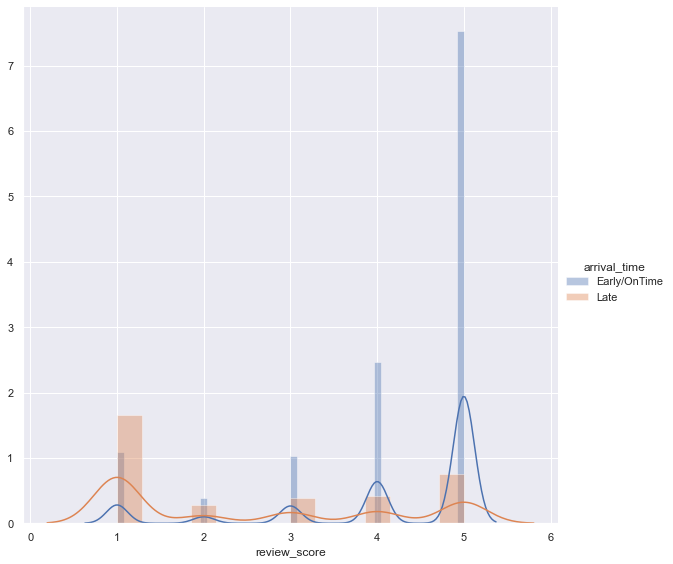

In [30]:
sb.FacetGrid(data, hue="arrival_time", height=8) \
   .map(sb.distplot, 'review_score') \
   .add_legend();
plt.show();

In [31]:
print(data.dtypes)

order_purchase_timestamp          object
order_delivered_carrier_date      object
order_delivered_customer_date     object
order_estimated_delivery_date     object
review_score                       int64
payment_sequential                 int64
payment_type                      object
payment_installments               int64
payment_value                    float64
customer_unique_id                object
zipCode_prefix_cust                int64
customer_city                     object
customer_state                    object
product_id                        object
seller_id                         object
shipping_limit_date               object
price                            float64
freight_value                    float64
product_name_lenght              float64
product_description_lenght       float64
product_photos_qty               float64
zipCode_prefix_seller              int64
seller_state                      object
product_category_name             object
delivery_days   

In [32]:
data.arrival_time.value_counts()

Early/OnTime    104285
Late              8867
Name: arrival_time, dtype: int64

# Observations

#### Clearly from the plot the customers are more likely to give an 4-5 rating if the product either arrives early or arrive on time.

#### Hence, delivery time impacts a lot to the customer rating and is a variable we’ve considered

In [33]:
#Isolating only the numeric variables and making a dataframe out of them
numeric_data = pd.DataFrame(data[["review_score", "payment_sequential", "payment_installments", "payment_value", "zipCode_prefix_cust", "price","freight_value","product_name_lenght","product_description_lenght","product_photos_qty","zipCode_prefix_seller","delivery_days","estimated_days","ships_in"]])
numeric_data.describe().round(2)

,review_score,payment_sequential,payment_installments,payment_value,zipCode_prefix_cust,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,zipCode_prefix_seller,delivery_days,estimated_days,ships_in
count,113152.00,113152.00,113152.00,113152.00,113152.00,113152.00,113152.00,113152.00,113152.00,113152.00,113152.00,113152.00,113152.00,113152.00
mean,4.07,1.09,2.95,172.43,35063.12,120.22,20.01,48.79,785.84,2.20,24328.07,12.43,24.48,6.70
std,1.36,0.69,2.78,266.80,29848.31,182.85,15.76,10.01,652.31,1.71,27527.04,9.46,8.84,5.49
min,1.00,1.00,0.00,0.00,1003.00,0.85,0.00,5.00,4.00,1.00,1001.00,0.00,3.00,2.00
25%,4.00,1.00,1.00,60.91,11250.00,39.90,13.07,42.00,345.00,1.00,6429.00,7.00,19.00,5.00
50%,5.00,1.00,2.00,108.00,24310.00,74.90,16.30,52.00,600.00,1.00,13568.00,10.00,24.00,6.00
75%,5.00,1.00,4.00,189.68,58770.00,134.00,21.19,57.00,985.00,3.00,26020.00,16.00,29.00,8.00
max,5.00,26.00,24.00,13664.08,99980.00,6735.00,409.68,76.00,3992.00,20.00,99730.00,210.00,156.00,1052.00


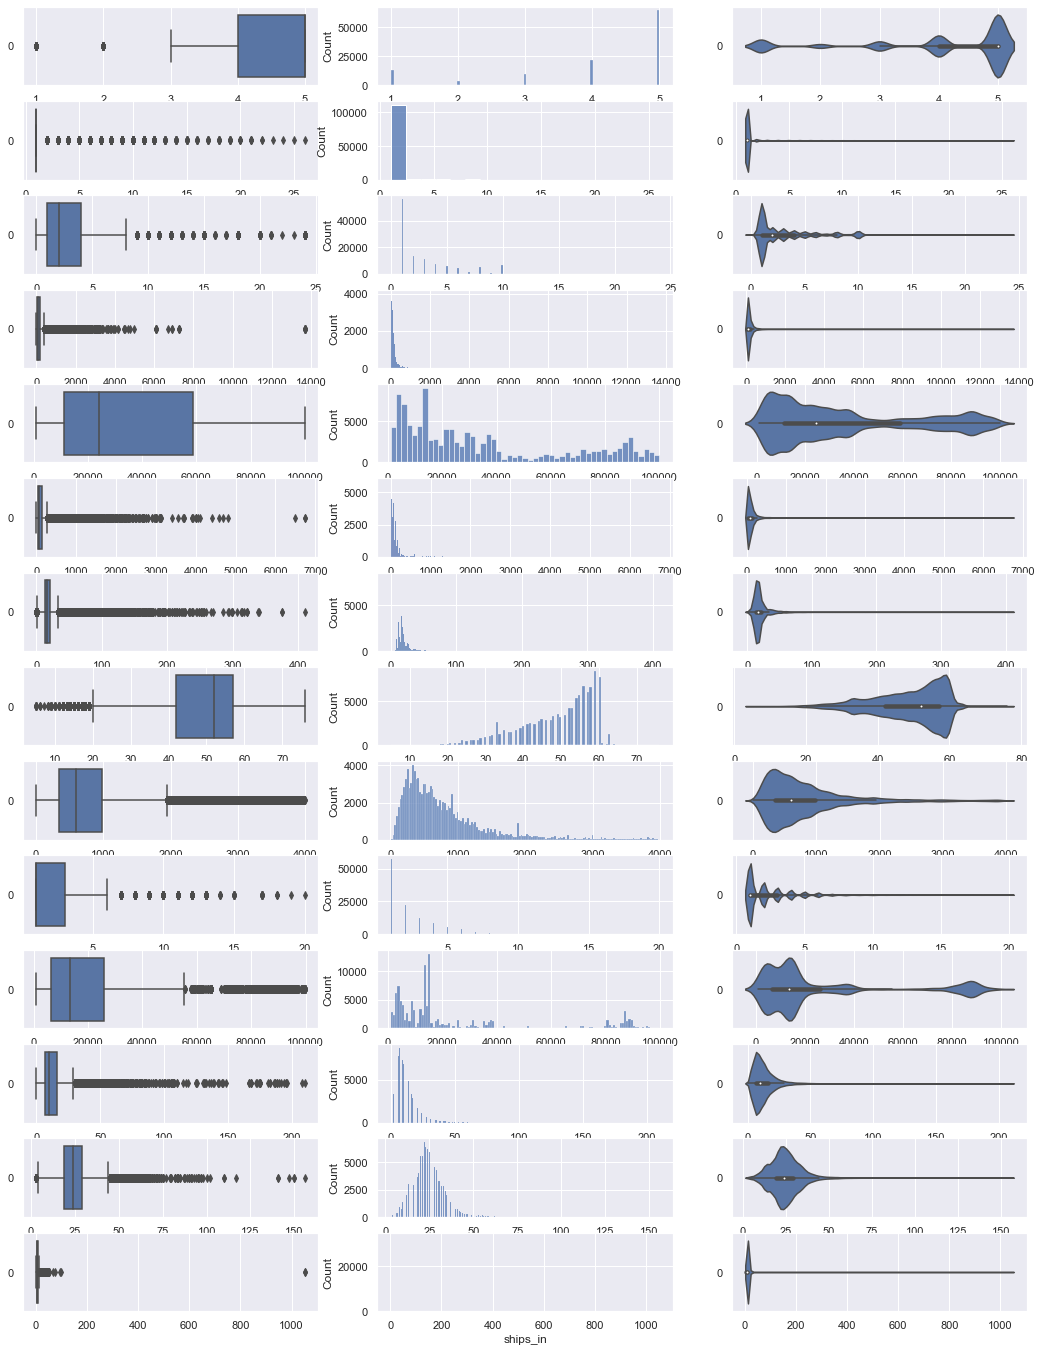

In [34]:
#Drawing the distributions of all variables
f, axes = plt.subplots(14, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

                            review_score  payment_sequential  \
review_score                    1.000000            0.006218   
payment_sequential              0.006218            1.000000   
payment_installments           -0.043334           -0.087971   
payment_value                  -0.083811           -0.065436   
zipCode_prefix_cust            -0.026576           -0.029785   
price                           0.002114            0.000227   
freight_value                  -0.034056            0.007560   
product_name_lenght            -0.012462           -0.002456   
product_description_lenght      0.014177           -0.010582   
product_photos_qty              0.022093           -0.008600   
zipCode_prefix_seller           0.026162            0.004657   
delivery_days                  -0.304412            0.002477   
estimated_days                 -0.061202            0.005404   
ships_in                       -0.026557            0.000843   

                            payment_ins

<AxesSubplot:>

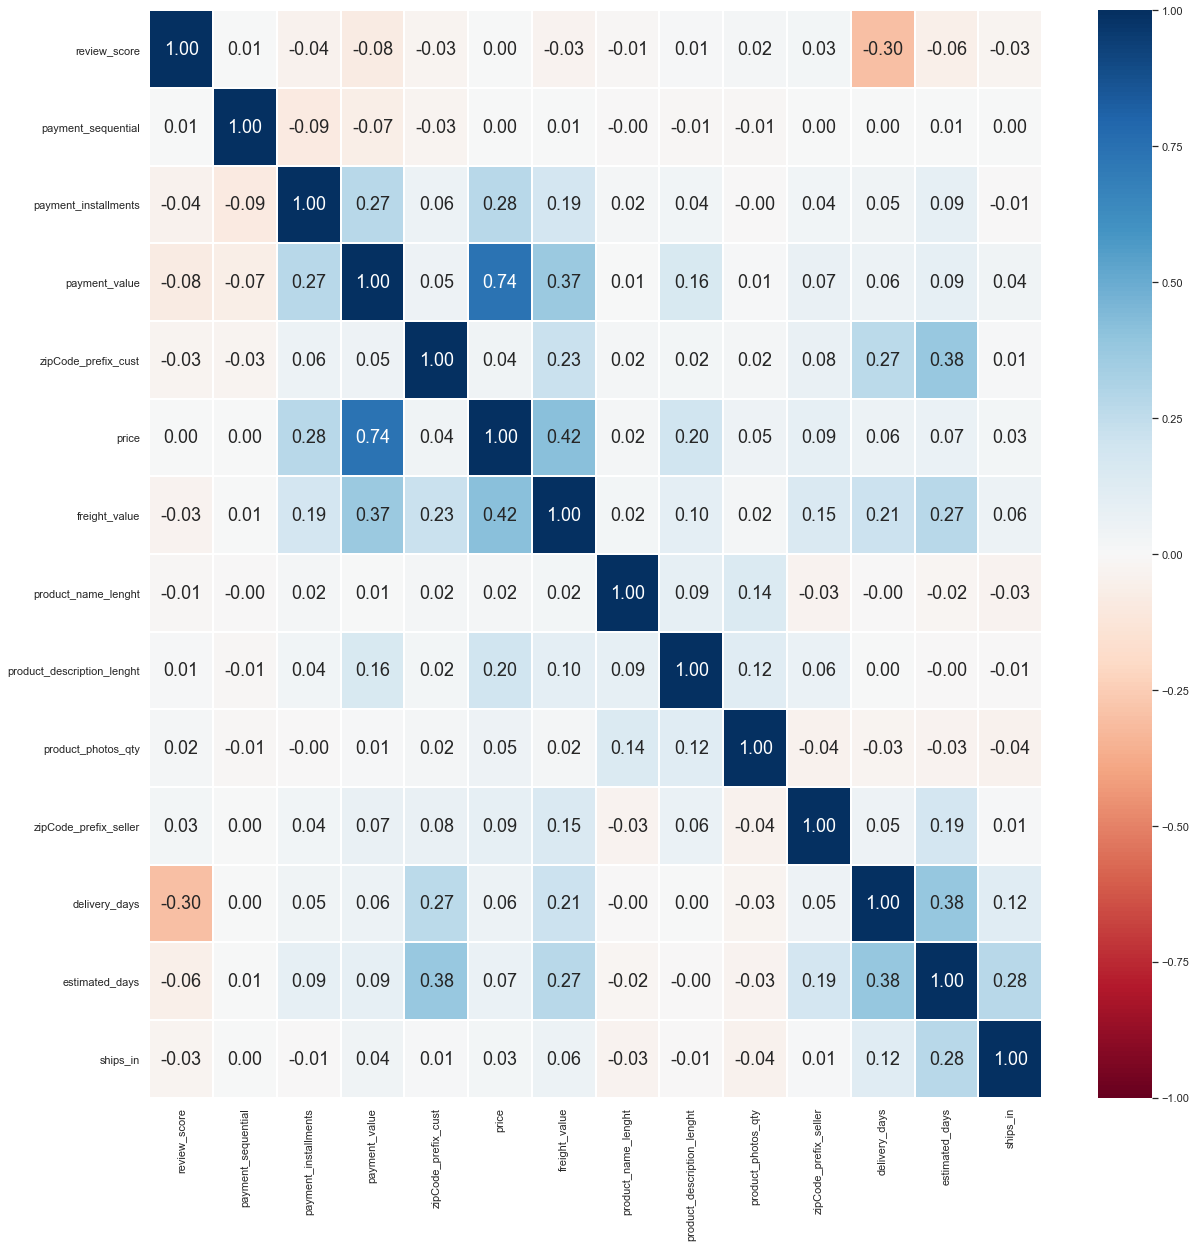

In [35]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

#### As shown in the correlation matrix above, if we observe the values for review score we see that in general review score does not have a very strong correlation with all the other variables as all the values are very low (and close to 0). 

#### We decided to continue our analysis and find the linear regression using only three of these variables: product_description_lenght, product_photos_qty and delivery_days. product_description_lenght and product_photos_qty had some of the highest positive values of correlation coeffecients as compared to other variables. We also noticed that delivery_days had a larger negative correlation value as compared to the other variables so we decided to look at that as well in our analyses. Lastly, we also thought it might be interesting to look at these variables.

In [36]:
#Isolating the variables that we wanted to focus on
numeric_data2 =pd.DataFrame(data[["review_score","product_description_lenght" , "product_photos_qty" , "delivery_days" ]])
numeric_data2.describe().round(2)                         

,review_score,product_description_lenght,product_photos_qty,delivery_days
count,113152.00,113152.00,113152.00,113152.00
mean,4.07,785.84,2.20,12.43
std,1.36,652.31,1.71,9.46
min,1.00,4.00,1.00,0.00
25%,4.00,345.00,1.00,7.00
50%,5.00,600.00,1.00,10.00
75%,5.00,985.00,3.00,16.00
max,5.00,3992.00,20.00,210.00


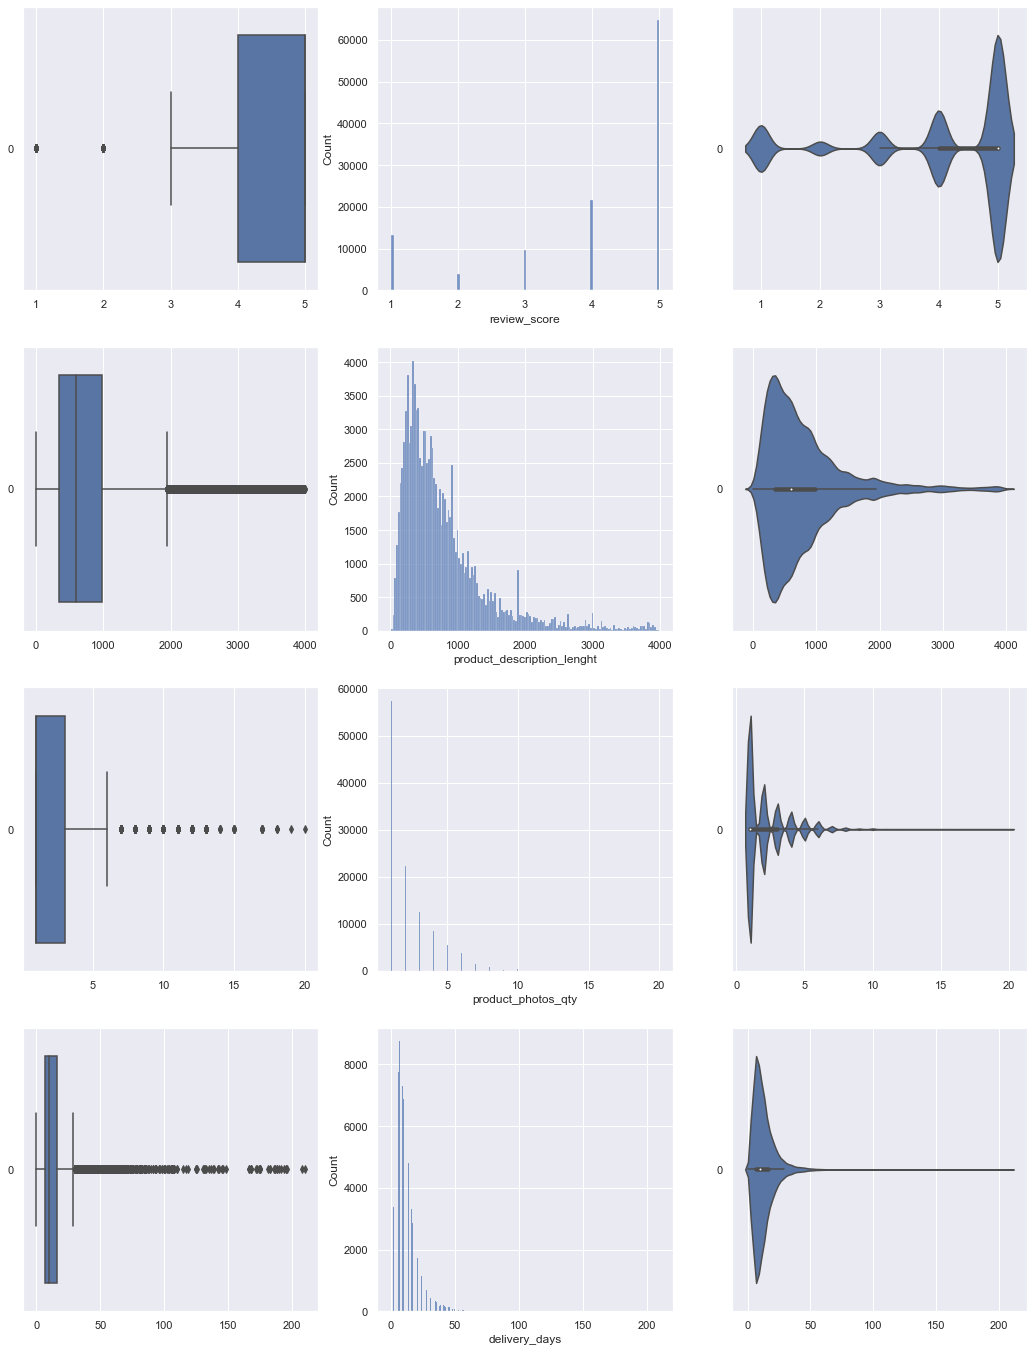

In [37]:
# Drawing the distributions of the variables we chose
f, axes = plt.subplots(4, 3, figsize=(18, 24))

count = 0
for var in numeric_data2:
    sb.boxplot(data = numeric_data2[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data2[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data2[var], orient = "h", ax = axes[count,2])
    count += 1

# Linear Regression

Intercept of Regression 	: b =  [4.57398458]
Coefficients of Regression 	: a =  [[ 3.10742512e-05  1.04956293e-02 -4.45974954e-02]]

                   Predictors  Coefficients
0  product_description_lenght      0.000031
1          product_photos_qty      0.010496
2               delivery_days     -0.044597



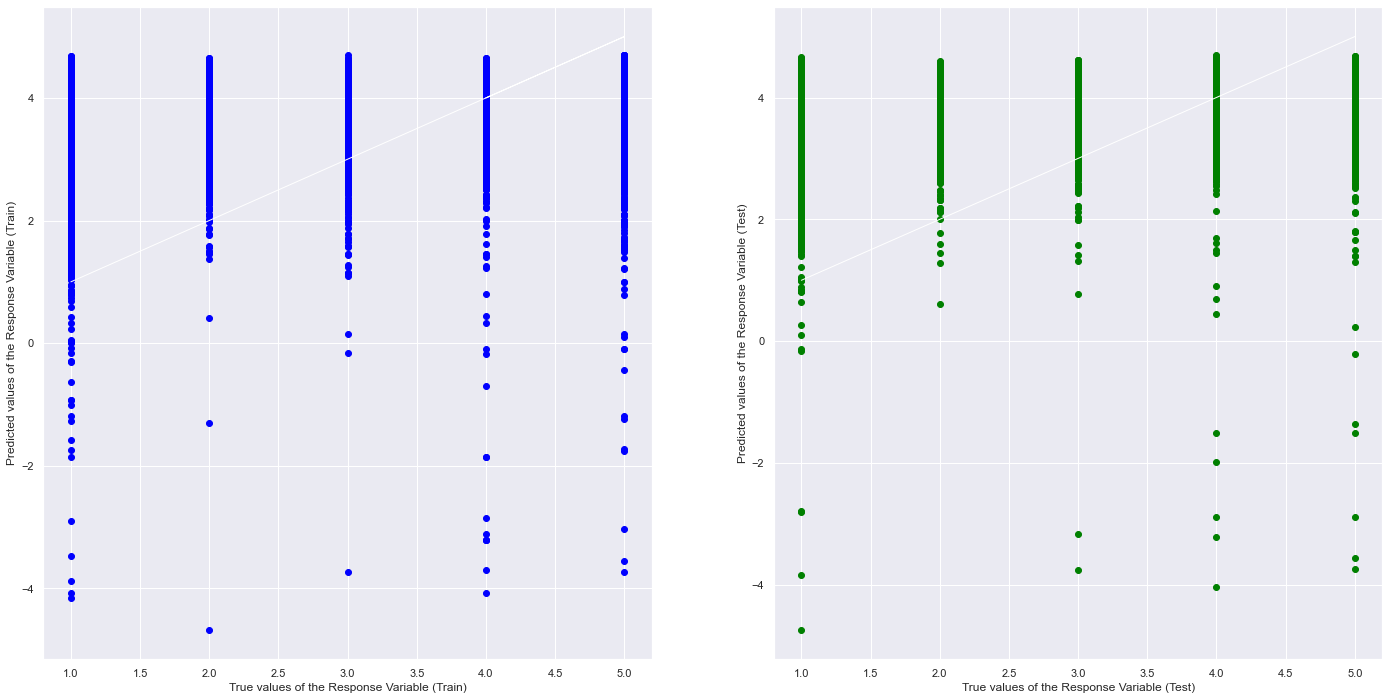

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.0956615056268082
Mean Squared Error (MSE) 	: 1.6670011255630224

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.08511056533267947
Mean Squared Error (MSE) 	: 1.6950703596358154



In [38]:
# Import essential models and functions from sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

numeric_data2 =pd.DataFrame(data[["review_score","product_description_lenght" , "product_photos_qty" , "delivery_days" ]])

# Extract Response and Predictors
y = pd.DataFrame(numeric_data2["review_score"])
X = pd.DataFrame(numeric_data2[["product_description_lenght", "product_photos_qty", "delivery_days"]])

# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

# Linear Regression using Train Data
linreg = LinearRegression()         # create the linear regression object
linreg.fit(X_train, y_train)        # train the linear regression model

# Coefficients of the Linear Regression line
print('Intercept of Regression \t: b = ', linreg.intercept_)
print('Coefficients of Regression \t: a = ', linreg.coef_)
print()

# Print the Coefficients against Predictors
print(pd.DataFrame(list(zip(X_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Response corresponding to Predictors
y_train_pred = linreg.predict(X_train)
y_test_pred = linreg.predict(X_test)

# Plot the Predictions vs the True values
f, axes = plt.subplots(1, 2, figsize=(24, 12))
axes[0].scatter(y_train, y_train_pred, color = "blue")
axes[0].plot(y_train, y_train, 'w-', linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable (Train)")
axes[0].set_ylabel("Predicted values of the Response Variable (Train)")
axes[1].scatter(y_test, y_test_pred, color = "green")
axes[1].plot(y_test, y_test, 'w-', linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable (Test)")
axes[1].set_ylabel("Predicted values of the Response Variable (Test)")
plt.show()

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_train, y_train))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_train, y_train_pred))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(X_test, y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(y_test, y_test_pred))
print()

# Observations on Linear Regression

#### The Data type for Review is categorical, i.e, numbers in the set  {1, 2, 3, 4, 5}. 

#### But, the predicted values are real numbers instead of categorical values which leads to a drop in the R2 value.

#### Linear regression analysis is not as optimal as we expected. Hence, we decided to do other Regression and Classification Analysis

# Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import linear_model
from sklearn.metrics import confusion_matrix

Number of Generations : 5
5    64700
4    21704
1    13264
3     9557
2     3927
Name: review_score, dtype: int64


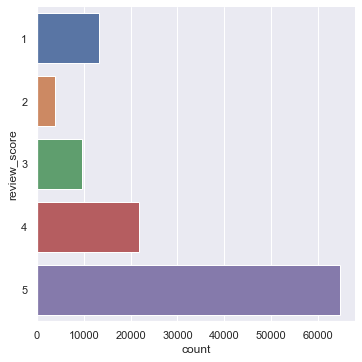

In [40]:
# Review Scores in the Dataset
print("Number of Generations :", len(data["review_score"].unique()))

# number of each score
print(data["review_score"].value_counts())
sb.catplot(y = "review_score", data = data, kind = "count")

In [41]:
#Listing all the numerical variables (again) in the form of an array
LogReg = ["payment_sequential", "payment_installments", "payment_value", "zipCode_prefix_cust", "price","freight_value","product_name_lenght","product_description_lenght","product_photos_qty","zipCode_prefix_seller","delivery_days","estimated_days","ships_in","review_score"]

In [42]:
x_train, x_test, y_train, y_test = train_test_split(data[LogReg[:-1]], data[LogReg[-1]], test_size=0.3)
print("Train Set :",x_train.shape, y_train.shape)
print("Test Set  :", x_test.shape, y_test.shape)

Train Set : (79206, 13) (79206,)
Test Set  : (33946, 13) (33946,)


In [43]:
# Training multi-classification model with logistic regression
lbfgs = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs')
lbfgs.fit(x_train, y_train)

#Predicting values corresponding to the columns
lbfgs_train_pred = lbfgs.predict(x_train)
lbfgs_test_pred = lbfgs.predict(x_test)

#Calculating Accuracies
print ("Logistic regression Train Accuracy ::", metrics.accuracy_score(y_train, lbfgs.predict(x_train)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lbfgs.predict(x_test)))


Logistic regression Train Accuracy :: 0.5714339822740702
Logistic regression Test Accuracy ::  0.5740882578212455


C:\Users\kp27d\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [44]:
#Training multi-classification model using newton-cg solver
newton = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg').fit(x_train, y_train)

#Predicting values corresponding to the columns
newton_train_pred = newton.predict(x_train)
newton_test_pred = newton.predict(x_test)

print ("Logistic regression Train Accuracy ::", metrics.accuracy_score(y_train, newton.predict(x_train)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, newton.predict(x_test)))

Logistic regression Train Accuracy :: 0.5925434941797338
Logistic regression Test Accuracy ::  0.5946797855417427


C:\Users\kp27d\Downloads\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


In [45]:
#Training multi-classification model using sag solver
sag = linear_model.LogisticRegression(multi_class='multinomial', solver='sag').fit(x_train, y_train)

#Predicting values corresponding to the columns
sag_train_pred = sag.predict(x_train)
sag_test_pred = sag.predict(x_test)

print ("Logistic regression Train Accuracy ::", metrics.accuracy_score(y_train, sag.predict(x_train)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, sag.predict(x_test)))

Logistic regression Train Accuracy :: 0.5716991137035073
Logistic regression Test Accuracy ::  0.5742355505803335


C:\Users\kp27d\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [46]:
#Training multi-classification model using saga solver
saga = linear_model.LogisticRegression(multi_class='multinomial', solver='saga').fit(x_train, y_train)

#Predicting values corresponding to the columns
saga_train_pred = saga.predict(x_train)
saga_test_pred = saga.predict(x_test)

print ("Logistic regression Train Accuracy ::", metrics.accuracy_score(y_train, saga.predict(x_train)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, saga.predict(x_test)))

Logistic regression Train Accuracy :: 0.5718506173774714
Logistic regression Test Accuracy ::  0.5741471749248807


C:\Users\kp27d\Downloads\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


#### Because of the warning "coeff did not converge", we tried increasing the number of max iterations as shown below. This gave us no warning  for the lbfgs solver but at the same time took a much longer time to run. The newton solver in the part below has been inserted as comments because it was not running even after a long time.

In [47]:
lbfgs2 = linear_model.LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter = 10000).fit(x_train, y_train)

In [48]:
print ("Logistic regression Train Accuracy ::", metrics.accuracy_score(y_train, lbfgs2.predict(x_train)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, lbfgs2.predict(x_test)))

Logistic regression Train Accuracy :: 0.5904476933565639
Logistic regression Test Accuracy ::  0.5936781947799447


In [49]:
#newton2 = linear_model.LogisticRegression(multi_class='multinomial',solver='newton-cg',max_iter = 10000).fit(x_train, y_train)
#print ("Logistic regression Train Accuracy ::", metrics.accuracy_score(y_train, newton2.predict(x_train)))
#print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, newton2.predict(x_test)))

In [50]:
sag2 = linear_model.LogisticRegression(multi_class='multinomial', solver='sag',max_iter = 10000).fit(x_train, y_train)
print ("Logistic regression Train Accuracy ::", metrics.accuracy_score(y_train, sag2.predict(x_train)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, sag2.predict(x_test)))

Logistic regression Train Accuracy :: 0.584665303133601
Logistic regression Test Accuracy ::  0.5879043186236964


In [51]:
saga2 = linear_model.LogisticRegression(multi_class='multinomial', solver='saga', max_iter = 10000).fit(x_train, y_train)
print ("Logistic regression Train Accuracy ::", metrics.accuracy_score(y_train, saga2.predict(x_train)))
print ("Logistic regression Test Accuracy :: ", metrics.accuracy_score(y_test, saga2.predict(x_test)))

Logistic regression Train Accuracy :: 0.5797919349544226
Logistic regression Test Accuracy ::  0.5828669062628881


# Random Forest Regression

In [52]:
X = pd.DataFrame(numeric_data[['payment_sequential','payment_installments','payment_value','price','freight_value','product_name_lenght','product_description_lenght','product_photos_qty']])                       

In [53]:
Y = pd.DataFrame(numeric_data[['review_score']])

In [54]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3)

In [55]:
#We now import the RandomForestRegressor from sklearn library
from sklearn.ensemble import RandomForestRegressor

#The number of estimators signifies the number of regressing decision trees we wish to use 
#Increasing the number of estimators increases the accuracy,but this increase saturates after a certain number of trees
rforest = RandomForestRegressor(n_estimators=100, random_state=0)
rforest.fit(X_train, Y_train.values.ravel())
Y_train_pred = rforest.predict(X_train)
Y_test_pred = rforest.predict(X_test)

In [56]:
#We evaluate the algorithm using the explained variance value from sklearn library's metrics list
from sklearn.metrics import explained_variance_score
from sklearn import metrics
r2_train=explained_variance_score(Y_train,Y_train_pred)
r2_test=explained_variance_score(Y_test,Y_test_pred)
print("The Explained Variance R^2 on Train set is:",r2_train)
print("The Explained Variance R^2 on Test set is:",r2_test)
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_test_pred))

The Explained Variance R^2 on Train set is: 0.8258763724246609
The Explained Variance R^2 on Test set is: 0.1507493544995353
Mean Squared Error: 1.582915717711792


# Random Forest Classification

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
clf = RandomForestClassifier(n_estimators=100)
                            
clf.fit(X_train, Y_train.values.ravel())

RandomForestClassifier()

In [59]:
Y_clf_train_pred = clf.predict(X_train)
Y_clf_test_pred = clf.predict(X_test)

In [60]:
r2_train=explained_variance_score(Y_train,Y_clf_train_pred)
r2_test=explained_variance_score(Y_test,Y_clf_test_pred)

print("The Explained Variance R^2 on Train set is:",r2_train)
print("The Explained Variance R^2 on Test set is:",r2_test)

The Explained Variance R^2 on Train set is: 0.8362204724027351
The Explained Variance R^2 on Test set is: 0.8388903339986882


In [61]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_clf_test_pred))

Accuracy: 0.93881458787486


In [62]:
print('Mean Squared Error:', metrics.mean_squared_error(Y_test, Y_clf_test_pred))

Mean Squared Error: 0.30333470806575147


# Feature Importance Plot (Built-in Method)

## Random Forest Regression

Feature: 0, Score: 0.00631
Feature: 1, Score: 0.09260
Feature: 2, Score: 0.21181
Feature: 3, Score: 0.15584
Feature: 4, Score: 0.17891
Feature: 5, Score: 0.12184
Feature: 6, Score: 0.18594
Feature: 7, Score: 0.04674


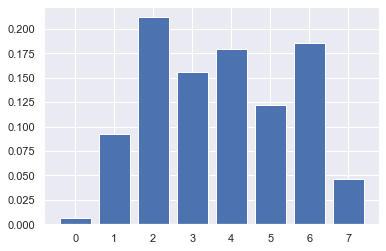

In [63]:
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot

# get importance
importance = rforest.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Feature: 0, Score: 0.00815
Feature: 1, Score: 0.09041
Feature: 2, Score: 0.20843
Feature: 3, Score: 0.16561
Feature: 4, Score: 0.18469
Feature: 5, Score: 0.12077
Feature: 6, Score: 0.17314
Feature: 7, Score: 0.04879


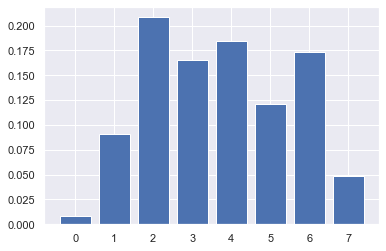

In [64]:
importance2 = clf.feature_importances_
# summarize feature importance
for i,v in enumerate(importance2):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance2))], importance2)
pyplot.show()

#### In the end we tried out another new concept for us: the feature importance plot. 

#### For random forest regression:  its graph suggests that about 4-5 of these features are the most important for prediction as compared to the other features. This features are feature number 2 to 6.  These include: payment_value, price, freight_value, product_name_lenght, product_description_lenght. Whereas feature 0 (payment_sequential) seems like the least important feature for prediction as compared to the other ones.

#### The graph for random forest classification suggests a similar result as that of random forest regression.

# Conclusion 

The below values have been taken from the full execution of this notebook.

### Linear Regression 
##### Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.09263651138369522

Mean Squared Error (MSE) 	: 1.673882770479667

##### Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.094291968777238

Mean Squared Error (MSE) 	: 1.6741605699889748


### Logistic Regression
#### Training multi-classification model with logistic regression
Logistic regression Train Accuracy :: 0.5727217635027649

Logistic regression Test Accuracy ::  0.5717610322276557

#### Training multi-classification model using newton-cg solver
Logistic regression Train Accuracy :: 0.5944120394919576

Logistic regression Test Accuracy ::  0.5918812231190714

#### Training multi-classification model using sag solver
Logistic regression Train Accuracy :: 0.5727217635027649

Logistic regression Test Accuracy ::  0.5721145348494668

#### Training multi-classification model using saga solver
Logistic regression Train Accuracy :: 0.5727470141150923

Logistic regression Test Accuracy ::  0.571878866434926

### Random Forest Regression
The Explained Variance R^2 on Train set is: 0.8256676460257486

The Explained Variance R^2 on Test set is: 0.15741014586062108

Mean Squared Error: 1.5603285131679938


### Random Forest Classification
The Explained Variance R^2 on Train set is: 0.8368584881154604

The Explained Variance R^2 on Test set is: 0.8399085655674344

Mean Squared Error: 0.2995050963294644

Accuracy: 0.938313792493961


The value of Explained Variance is the highest and Mean Squared Error is the least in Random Forest Classification. Thus, it is the best model to predict the review score a customer would likely give to a product.
